In [1]:
import yfinance as yf
from src.TimeSeries import TimeSeries
from src.TimeSeriesPlot import TimeSeriesPlot
import matplotlib.pyplot as plt
plt.style.use('seaborn-v0_8')

In [2]:
# Descargar precios de MELI
mercadolibre = 'MELI'
amazon = 'AMZN'
date = '2020-01-01'
muestreo = '1mo' # mensual

meli = yf.download(mercadolibre, start=date, interval=muestreo)
dates = meli.index
meli_prices = meli['Close'][mercadolibre]
ts_meli = TimeSeries(f'{mercadolibre}', dates, meli_prices)
ts_meli_base100 = ts_meli.normalize_base100()

amzn = yf.download(amazon, start=date, interval=muestreo)
dates = amzn.index
amzn_prices = amzn['Close'][amazon]
ts_amzn = TimeSeries(f'{amazon}', dates, amzn_prices)
ts_amzn_base100 = ts_amzn.normalize_base100()

YF.download() has changed argument auto_adjust default to True


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


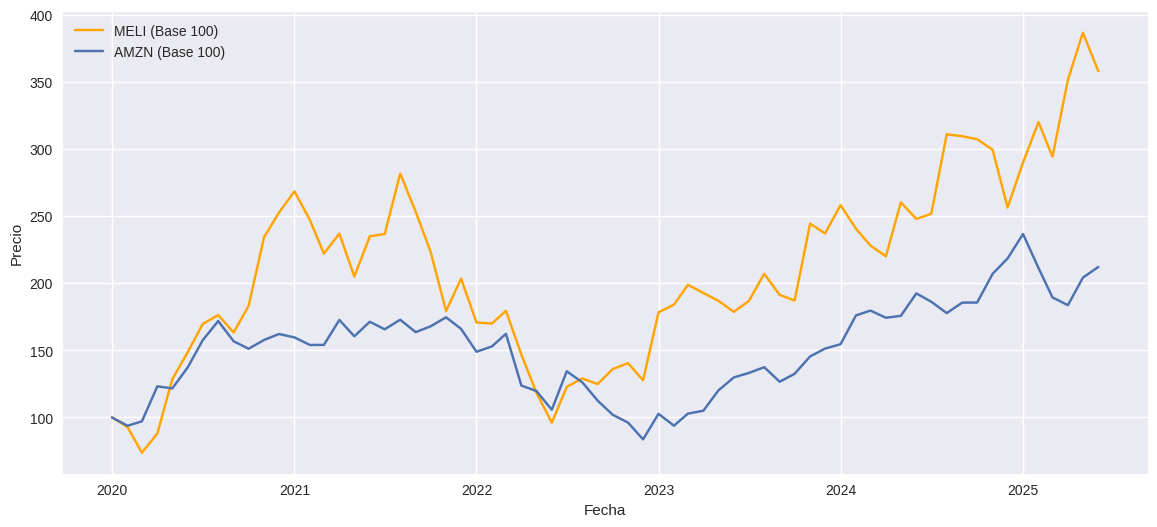

In [3]:
plot = TimeSeriesPlot(ts_meli_base100)
plot.add_original()
plot.add_another(ts_amzn_base100)
plot.show()

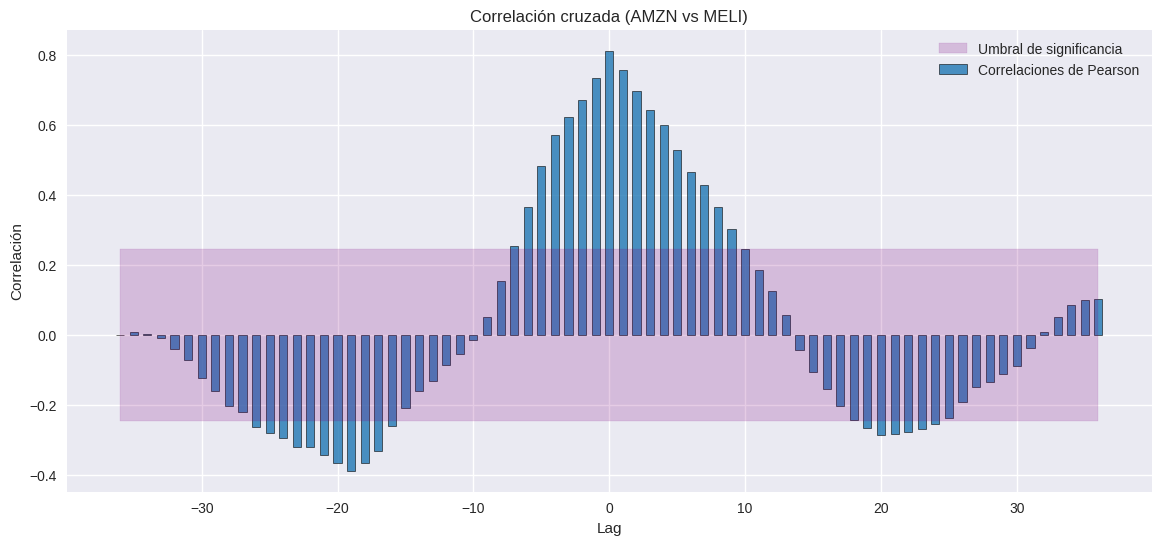

In [4]:
plot = TimeSeriesPlot(ts_amzn)
plot.add_cross_correlation_plot(ts_meli, 36)

MELI y AMZN están fuertemente correlacionadas (aprox 0.85).

Hay una correlación negativa significativa en -20, es decir, AMZN 20 meses antes VS MELI actualidad, lo que significa que un aumento en AMZN hace 20 meses está relacionado con una disminución del precio de MELI.